In [1]:
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt

In [2]:
# Four tasks, five models
WORD_ACCURACIES = np.ones((4, 5))
LETTER_ACCURACIES = np.ones((4, 5))
WORD_DEVIATIONS = np.ones((4, 5))
LETTER_DEVIATIONS = np.ones((4, 5))

FILE_PATHS = ['Results/OuterTransInnerLSTM/', 'Results/NestedTransformer_NoTF/']
FILE_LABELS = ['SG', 'SA', 'FC', 'NF']

for i in range(len(FILE_LABELS)):
    for j in range(len(FILE_PATHS)):
        with open(FILE_PATHS[j]+FILE_LABELS[i]+'_output.txt') as f:
            word_acc_arr = []
            letter_acc_arr = []

            for line in f:
                if(line[0] == 'w'):
                    word_acc_arr.append(float(line[15:50]))
                elif(line[0] == 'l'):
                    letter_acc_arr.append(float(line[17:50]))
        letter_acc = sum(letter_acc_arr) / len(letter_acc_arr)
        word_acc = sum(word_acc_arr) / len(word_acc_arr)
        word_std = statistics.stdev(word_acc_arr)
        letter_std = statistics.stdev(letter_acc_arr)

        WORD_ACCURACIES[i, j+3] = word_acc
        LETTER_ACCURACIES[i, j+3] = letter_acc
        WORD_DEVIATIONS[i, j+3] = word_std
        LETTER_DEVIATIONS[i, j+3] = letter_std
    
# Nested LSTM
WORD_ACCURACIES[:, 1] = np.array([98.4333, 99.4, 13.9333, 53.9333])
LETTER_ACCURACIES[:, 1] = np.array([99.6111, 99.8111, 41.0333, 65.1611])
WORD_DEVIATIONS[:, 1] = np.array([1.0651, .4899, 4.1333, 4.4642])
LETTER_DEVIATIONS[:, 1] = np.array([.2612, .1614, 7.0561, 4.0325])

# Outer LSTM, inner transformer
WORD_ACCURACIES[:, 2] = np.array([98.3000, 98.9333, 84.83333, 55.3333])
LETTER_ACCURACIES[:, 2] = np.array([99.0833, 99.5500, 91.6611, 95.4444])
WORD_DEVIATIONS[:, 2] = np.array([1.0899, 1.0520, 9.1388, 3.8151])
LETTER_DEVIATIONS[:, 2] = np.array([.7430, .5238, 6.1480, 4.2712])

# Indirection
WORD_ACCURACIES[:, 0] = 100
LETTER_ACCURACIES[:, 0] = 100
WORD_DEVIATIONS[:, 0] = 0
LETTER_DEVIATIONS[:, 0] = 0

print(WORD_ACCURACIES)
print(LETTER_ACCURACIES)
print(WORD_DEVIATIONS)
print(LETTER_DEVIATIONS)

[[100.         98.4333     98.3        75.3333333 100.       ]
 [100.         99.4        98.9333     75.3333334 100.       ]
 [100.         13.9333     84.83333    16.6666668  99.9333333]
 [100.         53.9333     55.3333     54.0000001  57.5333333]]
[[100.         99.6111     99.0833     92.3333332 100.       ]
 [100.         99.8111     99.55       92.2222223 100.       ]
 [100.         41.0333     91.6611     55.6111112  99.9777778]
 [100.         65.1611     95.4444     71.0555555  71.4166666]]
[[0.         1.0651     1.0899     6.51683477 0.        ]
 [0.         0.4899     1.052      6.12624372 0.        ]
 [0.         4.1333     9.1388     2.22222233 0.21081862]
 [0.         4.4642     3.8151     4.09757536 6.91429009]]
[[0.         0.2612     0.743      1.9387042  0.        ]
 [0.         0.1614     0.5238     2.0951312  0.        ]
 [0.         7.0561     6.148      5.83524369 0.07027277]
 [0.         4.0325     4.2712     3.72631972 4.6052134 ]]


In [3]:
models_words = np.random.randint(0, 100, size=(4, 5))
models_letters = np.random.randint(0, 100, size=(4, 5))

models_words_err = np.random.randint(1,5, size=(4, 5))
models_words_err = np.random.randint(1,5, size=(4, 5))

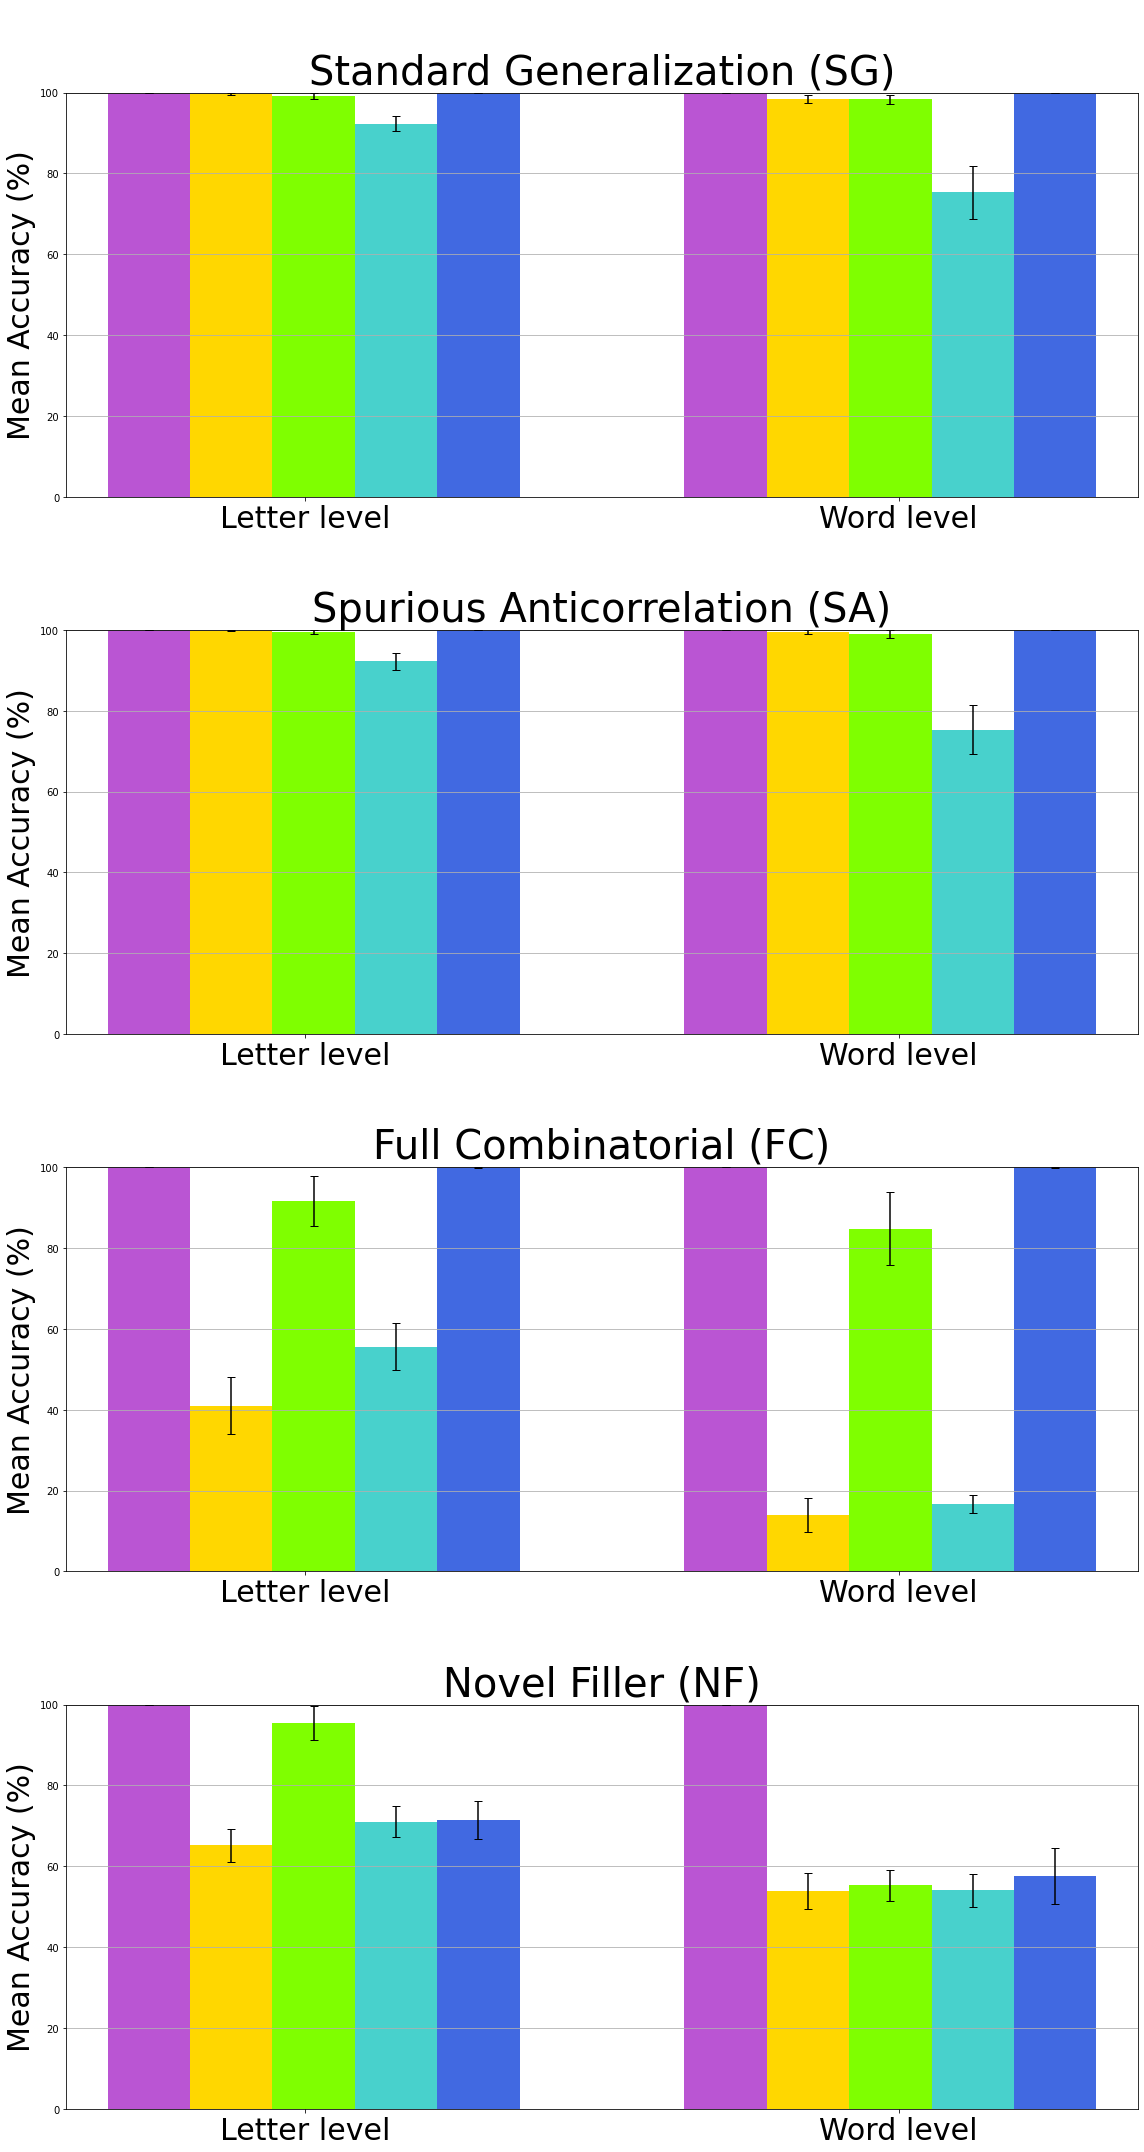

In [4]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(16, 30)
fig.subplots_adjust(hspace = 500, wspace = 10)

x = np.linspace(0, 4, 5)
x_labels=['Letter level', 'Word level']
titles = ['Standard Generalization (SG)', 'Spurious Anticorrelation (SA)', 'Full Combinatorial (FC)', 'Novel Filler (NF)']
colors = ['mediumorchid', 'gold', 'chartreuse', 'mediumturquoise', 'royalblue']
labels = ['Nested LSTM', 'Outer LSTM - Inner Transformer', 'Outer Transformer - Inner LSTM', 'Nested Transformer', 'Indirection model']

width = 1
for i in range(4):
    for k in range(5):
        ax[i].bar(k+7, WORD_ACCURACIES[i][k], width, yerr=WORD_DEVIATIONS[i][k], color=colors[k], ecolor='black', capsize=4, label=labels[k])
        ax[i].bar(k, LETTER_ACCURACIES[i][k], width, yerr=LETTER_DEVIATIONS[i][k], color=colors[k], ecolor='black', capsize=4, label=labels[k])

    ax[i].set_xlim(-1, 12)
    ax[i].set_xticks(np.array([1.9, 9.1]))
    ax[i].set_xticklabels(x_labels, fontsize=30)
    ax[i].set_ylim(0, 100)
    ax[i].set_ylabel('Mean Accuracy (%)', fontsize=30)
    ax[i].grid(axis='y')
    ax[i].set_title(' \n' + titles[i], fontsize=40)
plt.tight_layout()
plt.savefig('Figures/PlotsOfFiveModelsVert.png', dpi=300)
plt.show()